# Assignment

1. Lakukan image classification terhadap dataset fashion MNIST (https://keras.io/api/datasets/fashion_mnist/) dengan 2 arsitektur diatas! Tunjukan grafik epoch terhadap loss. Tentukan arsitektur dengan hasil terbaik dan jelaskan!

2. Buatlah sebuah arsitektur dengan convolution layer lebih dalam:

  - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
  - Max Pooling Layer 2x2
  - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
  - Max Pooling Layer 2x2

  Lakukan training kepada dataset MNIST & Fashion MNIST! Perhatikan hasil accuracy yang didapat & jelaskan!

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


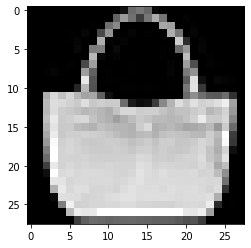

In [2]:
(feature_train, label_train), (feature_test, label_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[100], cmap=plt.get_cmap('gray'))

In [3]:
# feature_train

In [4]:
print(feature_train.shape)

(60000, 28, 28)


# Feature Engineering

In [5]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [6]:
print(feature_train.shape)

(60000, 28, 28, 1)


In [7]:
# feature_train

In [8]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [10]:
# feature_train

# Soal Nomor 1

## Multilayer Perceptron (Neural Network)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [12]:
# base_model = Sequential()

# base_model.add(Flatten(input_shape=(28, 28, 1)))
# base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
# base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

# opt = SGD(lr=0.05, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

# base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

# base_model.summary()

# history = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [14]:
# history_dataframe = pd.DataFrame(history.history)
# history_dataframe['epoch'] = history.epoch
# history_dataframe

In [15]:
# plot_loss(history) # epoch vs loss graph

In [16]:
# loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

# print("Test accuracy:", accuracy)
# print("Test loss:", loss)


In [22]:
def learn_rate(lrt):
  base_model = Sequential()
  base_model.add(Flatten(input_shape=(28, 28, 1)))
  base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
  base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)
  opt = SGD(lr=lrt, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss
  base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function
  base_model.summary()
  history = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=50)

  history_dataframe = pd.DataFrame(history.history)
  history_dataframe['epoch'] = history.epoch
  history_dataframe

  plot_loss(history)

  loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

  print("Test accuracy:", accuracy)
  print("Test loss:", loss)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7644 - accuracy: 0.7497 - val_loss: 0.5883 - val_accuracy: 0.8009
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5212 - accuracy: 0.8237 - val_loss: 0.5138 - val_accuracy: 0.8206
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4717 - accur

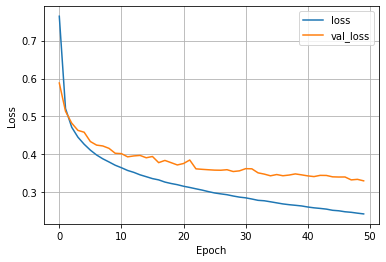

In [23]:
learn_rate(0.001)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5847 - accuracy: 0.7878 - val_loss: 0.5149 - val_accuracy: 0.8142
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4885 - accuracy: 0.8227 - val_loss: 0.5526 - val_accuracy: 0.8223
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4398 - accur

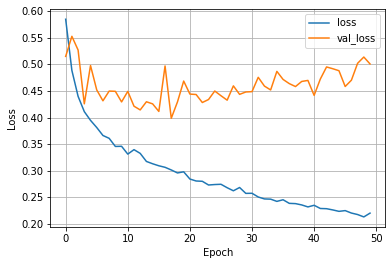

In [24]:
learn_rate(0.05)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5199 - accuracy: 0.8157 - val_loss: 0.4274 - val_accuracy: 0.8462
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3945 - accuracy: 0.8582 - val_loss: 0.4018 - val_accuracy: 0.8573
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3572 - accur

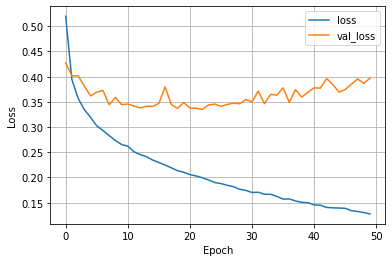

In [25]:
learn_rate(0.01)

## Convolutional Neural Network (CNN)

In [27]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

def learn_rate_cnn(lrte):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

  model.add(MaxPooling2D((2, 2))) # Pooling

  model.add(Flatten()) # Flatten hasil output

  # Fully connected layer
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
  model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

  opt = SGD(lr=lrte, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

  model.summary()

  history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=50)

  loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

  print("Test accuracy:", accuracy)
  print("Test loss:", loss)

  plot_loss(history_cnn)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5334 - accuracy: 0.8128 - val_loss: 

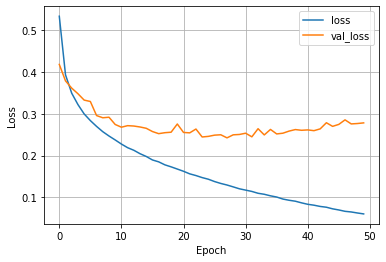

In [28]:
learn_rate_cnn(0.001)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4079 - accuracy: 0.8530 - val_loss: 

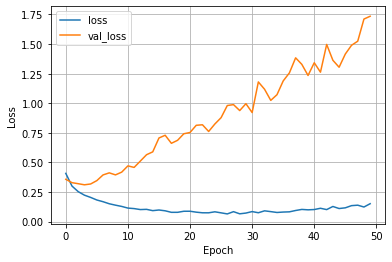

In [29]:
learn_rate_cnn(0.05)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4163 - accuracy: 0.8501 - val_loss: 

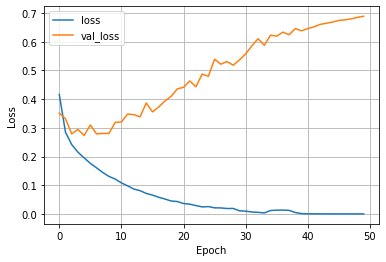

In [30]:
learn_rate_cnn(0.01)

##Kesimpulan

Disini saya melakukan prediksi menggunakan multilayer perceptron dan convolutional neural network. masing masingnya saya coba dengan variasi learning rate yang berbeda yaitu dari 0.001, 0.05, dan 0.01. Saya mencoba membandingkan 2 arsitektur tersebut berdasarkan learning rate 0.001 karena memiliki akurasi lebih baik dan epoch=50 agar grafiknya lebih jelas. Berdasarkan hasil pengamatan terhadap grafik dan nilai akurasi, saya mendapatkan hasil bahwa Multilayer Perceptron lebih baik digunakan karena nilai loss nya sudah mulai stabil.

# Soal nomor 2


##Fashion

In [31]:
def conv_filter_cnn(fltr):
  model = Sequential()
  model.add(Conv2D(fltr, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

  model.add(MaxPooling2D((2, 2))) # Pooling

  model.add(Flatten()) # Flatten hasil output

  # Fully connected layer
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
  model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

  opt = SGD(lr=0.001, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

  model.summary()

  history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=50)

  loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

  print("Test accuracy:", accuracy)
  print("Test loss:", loss)

  plot_loss(history_cnn)

###Filter 32

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5234 - accuracy: 0.8176 - val_loss: 

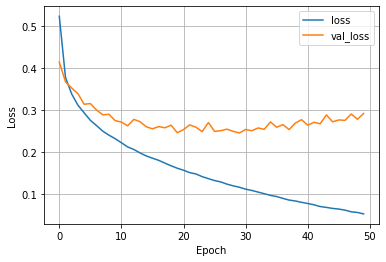

In [32]:
conv_filter_cnn(32)

###Filter 64

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               1081700   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4934 - accuracy: 0.8305 - val_

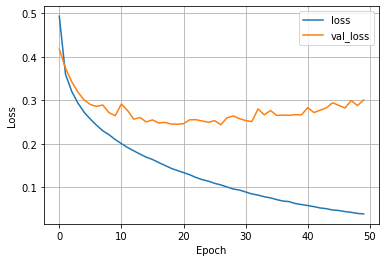

In [33]:
conv_filter_cnn(64)

###Deeper CNN 32 dan 64

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

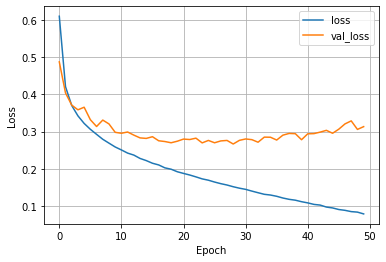

In [44]:
deeper_model = Sequential()
deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
deeper_model.add(MaxPooling2D((2, 2))) # Pooling
deeper_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(MaxPooling2D((2, 2))) # Pooling

deeper_model.add(Flatten()) # Flatten hasil output

# Fully connected layer
deeper_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
deeper_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.001, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

deeper_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function
deeper_model.summary()

history_cnn = deeper_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=50)

loss, accuracy = deeper_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

plot_loss(history_cnn)

###Kesimpulan

Jika dibandingkan antara CNN dan Deeper CNN, pada Deeper CNN, nilai loss train akan turun secara signifikan dari 61% ke 42% dan bisa kita lihat juga bahwa **akurasinya** turun jika dibandingkan dengan CNN biasa yaitu **90%** berbanding **91%** pada nilai **epoch=50** jika diperhatikan pada grafik nilai loss masih belum stabil sehingga kita masih belum mendapatkan nilai sesuai dengan yang kita inginkan. jumlah parameternyapun juga semakin sedikit jika dibandingkan dengan CNN biasa yaitu 179,926 (Deeper CNN) : 1,083,350 (CNN filter 64) : 1,083,350 : 542,230 (CNN filter 32), sehingga inputnya pada saat diflatten menjadi kecil. 

##MNIST

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


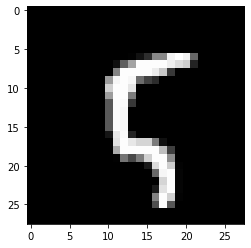

In [34]:
(feature_train1, label_train1), (feature_test1, label_test1) = mnist.load_data()

print("Train", feature_train1.shape, label_train1.shape)
print("Test", feature_test1.shape, label_test1.shape)

plt.imshow(feature_train1[100], cmap=plt.get_cmap('gray'))

In [35]:
feature_train1 = feature_train1.reshape((feature_train1.shape[0], 28, 28, 1))
feature_test1 = feature_test1.reshape((feature_test1.shape[0], 28, 28, 1))

In [37]:
label_train1 = to_categorical(label_train1)
label_test1 = to_categorical(label_test1)

print(label_train1)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [38]:
feature_train1 = feature_train1.astype('float32')
feature_test1 = feature_test1.astype('float32')

feature_train1 = feature_train1 / 255.0
feature_test1 = feature_test1 / 255.0

In [40]:
def conv_filter_cnn1(fltr1):
  model1 = Sequential()
  model1.add(Conv2D(fltr1, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

  model1.add(MaxPooling2D((2, 2))) # Pooling

  model1.add(Flatten()) # Flatten hasil output

  # Fully connected layer
  model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
  model1.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

  opt = SGD(lr=0.001, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

  model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

  model1.summary()

  history_cnn = model1.fit(feature_train1, label_train1, batch_size=32, validation_data=(feature_test1, label_test1), epochs=50)

  loss1, accuracy1 = model1.evaluate(feature_test1,  label_test1, verbose=2)

  print("Test accuracy:", accuracy1)
  print("Test loss:", loss1)

  plot_loss(history_cnn)

###Filter 32

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3082 - accuracy: 0.9118 - val_loss:

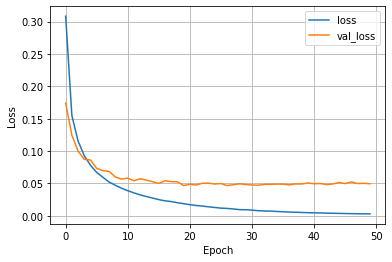

In [42]:
conv_filter_cnn1(32)

###Filter 64

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               1081700   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2695 - accuracy: 0.9204 - val_

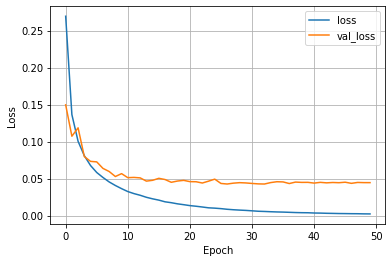

In [43]:
conv_filter_cnn1(64)

###Deeper CNN 32 dan 64

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

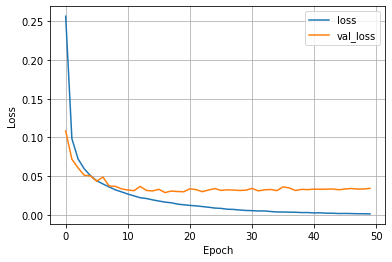

In [45]:
deeper_model1 = Sequential()
deeper_model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
deeper_model1.add(MaxPooling2D((2, 2))) # Pooling
deeper_model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
deeper_model1.add(MaxPooling2D((2, 2))) # Pooling

deeper_model1.add(Flatten()) # Flatten hasil output

# Fully connected layer
deeper_model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
deeper_model1.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.001, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

deeper_model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function
deeper_model1.summary()

history_cnn1 = deeper_model1.fit(feature_train1, label_train1, batch_size=32, validation_data=(feature_test1, label_test1), epochs=50)

loss1, accuracy1 = deeper_model1.evaluate(feature_test1,  label_test1, verbose=2)

print("Test accuracy:", accuracy1)
print("Test loss:", loss1)

plot_loss(history_cnn1)

###Kesimpulan

Jika dibandingkan antara CNN dan Deeper CNN, pada Deeper CNN, nilai loss train akan turun secara signifikan dari 25% ke 9% dan bisa kita lihat juga bahwa **akurasinya** naik jika dibandingkan dengan CNN biasa yaitu **99%** berbanding **98%**. jumlah parameternyapun juga semakin sedikit jika dibandingkan dengan CNN biasa yaitu 179,926 (Deeper CNN) : 1,083,350 (CNN filter 64) : 1,083,350 : 542,230 (CNN filter 32), sehingga inputnya pada saat diflatten menjadi kecil. 